
### Name : Devashish Mahajan
### kaggle Account : https://www.kaggle.com/devashishmahajan

# Deep Neural Networks

##  Convolutional Neural Network (CNN)
- Animal Dataset (https://www.kaggle.com/datasets/devashishmahajan/animalsbutterflycowelephantsheepsquirrel/download?datasetVersionNumber=1)
- Dataset Directory


In [1]:
### Import Libraries

import tensorflow as tf

import os

#import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf

In [2]:
#Check for GPU available
physical_devices = tf.config.list_physical_devices('GPU') 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    
%matplotlib inline

Num GPUs Available:  1


In [3]:
# Some basic parameters

inpDir = 'input' # location where input data is stored
outDir = 'output' # location to store outputs
subDir = 'animals'


RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
tf.random.set_seed(RANDOM_STATE)

EPOCHS = 60 # number of cycles to run

BATCH_SIZE = 16 # inline of Traing Rows being 60000

TEST_SIZE = 0.2

IMG_HEIGHT = 188

IMG_WIDTH = 188

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,10),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

CMAP = plt.cm.brg

plt.rcParams.update(params) # update rcParams

## Helper Function

In [4]:
def fn_plot_hist(hist_df):
    
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)

    ax = axes[0]

    hist_df.plot(y = [hist_df.columns[0],hist_df.columns[2]], ax = ax, colormap=CMAP)

    lossmin = hist_df[hist_df.columns[0]].min()

    testmin = hist_df[hist_df.columns[2]].min()

    # little beautification
    txtstr = "Min {}: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(hist_df.columns[0],
                                                                          lossmin,
                                                                          testmin) #text to plot

    # place a text box in upper left in axes coords

    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    ax.set_xlabel("Epochs")

    ax.set_ylabel(hist_df.columns[0].capitalize())

    ax.grid();

    ax = axes[1]

    hist_df.plot( y = [hist_df.columns[1], hist_df.columns[3]], ax = ax, colormap=CMAP)

    # little beautification
    accmin = hist_df[hist_df.columns[1]].max()
    testmin = hist_df[hist_df.columns[3]].max()
    txtstr = "Max {}: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(hist_df.columns[1],
                                                                                accmin,
                                                                                testmin) #text to plot

    # place a text box in upper left in axes coords

    ax.text(0.4, 0.5, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(hist_df.columns[1].capitalize())
    ax.grid();
    plt.tight_layout()

In [5]:
def fn_plot_label(tr_ds, ts_ds):
    
    plt.figure(figsize = (15,5))
    
    plt.subplot(1,2,1)

    train_labels = tf.concat([y for x, y in tr_ds], axis = 0).numpy()
    
    unique, _, counts = tf.unique_with_counts(train_labels)
    
    plt.bar(range(len(unique)), counts, align='center',color = 'DarkBlue', alpha = 0.7)
    
    plt.title('Training Set')
    
    plt.xticks(range(len(unique)), class_names);
    plt.grid()


    plt.subplot(1,2,2)

    val_labels = tf.concat([y for x, y in ts_ds], axis = 0).numpy()
    
    unique, _, counts = tf.unique_with_counts(val_labels)
    
    plt.bar(range(len(unique)), counts, align='center', color = 'Orange', alpha = 0.7)
    
    plt.title('Test Set')
    
    plt.xticks(range(len(unique)), class_names)
    
    plt.grid()
    
    plt.show()

## Load Data

In [6]:
# inpDir = 'input' # location where input data is stored
# subDir = 'animals'

#Link to download dataset
# https://www.kaggle.com/datasets/devashishmahajan/animalsbutterflycowelephantsheepsquirrel/download?datasetVersionNumber=1

# To download dataset on colab from kaggle, follow dataset download instructions given by kaggle
# kaggle datasets download -d devashishmahajan/animalsbutterflycowelephantsheepsquirrel
data_dir = os.path.join(inpDir,subDir)

In [7]:
# load data and split in training and validation from a sub dir

# training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=TEST_SIZE,
    subset="training",
    seed=RANDOM_STATE,
    
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

# testing dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=TEST_SIZE,
    subset="validation",
    seed=RANDOM_STATE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

Found 8196 files belonging to 5 classes.
Using 6557 files for training.
Found 8196 files belonging to 5 classes.
Using 1639 files for validation.


In [8]:
class_names = train_ds.class_names

print('Total: {:3d} Classes; namely : {:s}'.format(len(class_names), str(class_names)))

Total:   5 Classes; namely : ['butterfly', 'cow', 'elephant', 'sheep', 'squirrel']


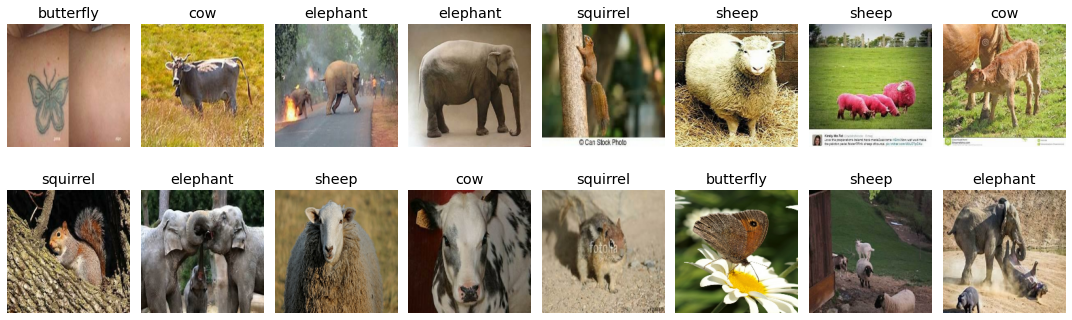

In [9]:
plt.figure(figsize=(15,5))

for images, labels in train_ds.take(1): # gets a batch of first BATCH_SIZE images
    
    for i in range(BATCH_SIZE):
        
        plt.subplot(2,int(BATCH_SIZE/2),i+1)
        
        plt.grid(False)
        
        plt.imshow(images[i].numpy().astype("uint8")) # image_size has converted these images to float
        
        plt.title(class_names[labels[i]])
        
        plt.axis("off")
    
    plt.tight_layout()
    
    plt.show()

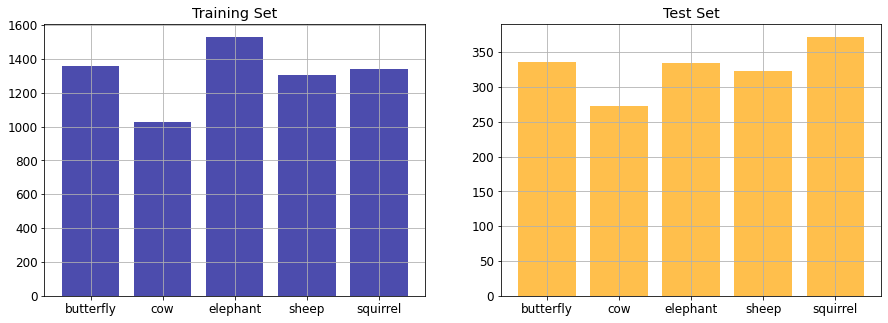

In [10]:
fn_plot_label(train_ds, test_ds)


In [11]:
## Optimize for performance
#loading data into cache for faster execution
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
# Importing DenseNet121
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input


# Prepare your model

In [13]:
#Building Model
model_DenseNet121 = DenseNet121(weights='imagenet',include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)) 

#DenseNet121 layer
x=model_DenseNet121.output

# Top Layer 1
x= tf.keras.layers.GlobalAveragePooling2D()(x)

# Top Layer 2
x= tf.keras.layers.BatchNormalization()(x)

# Top Layer 3
x= tf.keras.layers.Dropout(0.5)(x)

# Top Layer 4
x= tf.keras.layers.Dense(1024,activation='relu')(x) 

# Top Layer 5
x= tf.keras.layers.Dense(512,activation='relu')(x) 

# Top Layer 6
x= tf.keras.layers.BatchNormalization()(x)

# Top Layer 7
x= tf.keras.layers.Dropout(0.5)(x)

# Top Layer 8
OutputLayer=tf.keras.layers.Dense(5)(x) 

model=tf.keras.models.Model(inputs=model_DenseNet121.input ,outputs=OutputLayer)

In [14]:
#Model summary before freezing layers
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 188, 188, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 194, 194, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 94, 94, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 94, 94, 64)   256         ['conv1/conv[0][0]']         

                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 47, 47, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 47, 47, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 47, 47, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 47, 47, 192)  0          ['conv2_block3_concat[0][0]',    
 te)      

 conv3_block2_1_conv (Conv2D)   (None, 23, 23, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 23, 23, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 23, 23, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 23, 23, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 23, 23, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 23, 23, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 23, 23, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 23, 23, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 23, 23, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 23, 23, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 23, 23, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_blo

 conv4_block3_0_bn (BatchNormal  (None, 11, 11, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 11, 11, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 11, 11, 128)  40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 11, 11, 128)  512        ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 11, 11, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 11, 11, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 11, 11, 32)   36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 11, 11, 480)  0          ['conv4_block6_concat[0][0]',    
 te)      

 conv4_block11_2_conv (Conv2D)  (None, 11, 11, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 11, 11, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 11, 11, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 11, 11, 608)  0          ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_0_relu (Activati  (None, 11, 11, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 11, 11, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 11, 11, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 11, 11, 128)  0          ['conv4_block16_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 11, 11, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 11, 11, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 11, 11, 896)  0          ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block24_concat (Concaten  (None, 11, 11, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 11, 11, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 11, 11, 1024  0           ['pool4_bn[0][0]']               
                                )                                                                 
                                                                                                  
 pool4_conv (Conv2D)            (None, 11, 11, 512)  524288      ['pool4_relu[0][0]']             
          

                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 5, 5, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 5, 5, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 5, 5, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_0_relu (Activatio  (None, 5, 5, 640)   0           ['conv5_block5_0_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 5, 5, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 5, 5, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_block9_1_bn (BatchNormal  (None, 5, 5, 128)   512         ['conv5_block9_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

 conv5_block13_1_bn (BatchNorma  (None, 5, 5, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 5, 5, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv5_block13_1_relu[0][0]']   
                                                                                                  
 conv5_block13_concat (Concaten  (None, 5, 5, 928)   0           ['conv5_block12_concat[0][0]',   
 ate)                                                             'conv5_block13_2_conv[0][0]']   
          

                                                                                                  
 batch_normalization_1 (BatchNo  (None, 512)         2048        ['dense_1[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 dropout_1 (Dropout)            (None, 512)          0           ['batch_normalization_1[0][0]']  
                                                                                                  
 dense_2 (Dense)                (None, 5)            2565        ['dropout_1[0][0]']              
                                                                                                  
Total params: 8,620,613
Trainable params: 8,533,893
Non-trainable params: 86,720
__________________________________________________________________________________________________


In [15]:
#Freezing/Non-trainable params for DenseNet layers
for layer in model.layers[:-8]:
    layer.trainable=False

#Trainable params of layers added after DenseNet
for layer in model.layers[-8:]:
    layer.trainable=True

In [16]:
#Model summary after freezing layers
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 188, 188, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 194, 194, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 94, 94, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 94, 94, 64)   256         ['conv1/conv[0][0]']         

                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 47, 47, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 47, 47, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 47, 47, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 47, 47, 192)  0          ['conv2_block3_concat[0][0]',    
 te)      

 conv3_block2_1_conv (Conv2D)   (None, 23, 23, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 23, 23, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 23, 23, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 23, 23, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 23, 23, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 23, 23, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 23, 23, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 23, 23, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 23, 23, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 23, 23, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 23, 23, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_blo

 conv4_block3_0_bn (BatchNormal  (None, 11, 11, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 11, 11, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 11, 11, 128)  40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 11, 11, 128)  512        ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 11, 11, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 11, 11, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 11, 11, 32)   36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 11, 11, 480)  0          ['conv4_block6_concat[0][0]',    
 te)      

 conv4_block11_2_conv (Conv2D)  (None, 11, 11, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 11, 11, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 11, 11, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 11, 11, 608)  0          ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_0_relu (Activati  (None, 11, 11, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 11, 11, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 11, 11, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 11, 11, 128)  0          ['conv4_block16_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 11, 11, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 11, 11, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 11, 11, 896)  0          ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block24_concat (Concaten  (None, 11, 11, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 11, 11, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 11, 11, 1024  0           ['pool4_bn[0][0]']               
                                )                                                                 
                                                                                                  
 pool4_conv (Conv2D)            (None, 11, 11, 512)  524288      ['pool4_relu[0][0]']             
          

                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 5, 5, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 5, 5, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 5, 5, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_0_relu (Activatio  (None, 5, 5, 640)   0           ['conv5_block5_0_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 5, 5, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 5, 5, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_block9_1_bn (BatchNormal  (None, 5, 5, 128)   512         ['conv5_block9_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

 conv5_block13_1_bn (BatchNorma  (None, 5, 5, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 5, 5, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv5_block13_1_relu[0][0]']   
                                                                                                  
 conv5_block13_concat (Concaten  (None, 5, 5, 928)   0           ['conv5_block12_concat[0][0]',   
 ate)                                                             'conv5_block13_2_conv[0][0]']   
          

                                                                                                  
 batch_normalization_1 (BatchNo  (None, 512)         2048        ['dense_1[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 dropout_1 (Dropout)            (None, 512)          0           ['batch_normalization_1[0][0]']  
                                                                                                  
 dense_2 (Dense)                (None, 5)            2565        ['dropout_1[0][0]']              
                                                                                                  
Total params: 8,620,613
Trainable params: 1,580,037
Non-trainable params: 7,040,576
__________________________________________________________________________________________________


# Compile and Fit your model

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              
              metrics=['accuracy'])


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=5, min_lr=0.001)

history = model.fit(train_ds,
                    epochs=40,
                    batch_size=BATCH_SIZE,
                    validation_data=test_ds, callbacks=[reduce_lr])

Epoch 1/40
410/410 [==============================] - 47s 90ms/step - loss: 1.3783 - accuracy: 0.5316 - val_loss: 0.9497 - val_accuracy: 0.6181 - lr: 0.0100
Epoch 2/40
410/410 [==============================] - 29s 72ms/step - loss: 0.9938 - accuracy: 0.6311 - val_loss: 0.7738 - val_accuracy: 0.7023 - lr: 0.0100
Epoch 3/40
410/410 [==============================] - 29s 72ms/step - loss: 0.8830 - accuracy: 0.6640 - val_loss: 0.6874 - val_accuracy: 0.7395 - lr: 0.0100
Epoch 4/40
410/410 [==============================] - 29s 72ms/step - loss: 0.8295 - accuracy: 0.6823 - val_loss: 0.7339 - val_accuracy: 0.7212 - lr: 0.0100
Epoch 5/40
410/410 [==============================] - 30s 72ms/step - loss: 0.8161 - accuracy: 0.6860 - val_loss: 0.7237 - val_accuracy: 0.7279 - lr: 0.0100
Epoch 6/40
410/410 [==============================] - 30s 72ms/step - loss: 0.7814 - accuracy: 0.7012 - val_loss: 0.7318 - val_accuracy: 0.7230 - lr: 0.0100
Epoch 7/40
410/410 [==============================] - 30s 

In [18]:
res_df = pd.DataFrame(history.history)
res_df

,loss,accuracy,val_loss,val_accuracy,lr
0,1.378284,0.531646,0.949693,0.618060,0.010000
1,0.993775,0.631081,0.773759,0.702257,0.010000
2,0.882964,0.664023,0.687379,0.739475,0.010000
3,0.829501,0.682324,0.733944,0.721171,0.010000
4,0.816100,0.685984,0.723713,0.727883,0.010000
5,0.781367,0.701235,0.731828,0.723002,0.010000
6,0.763933,0.714199,0.732946,0.720561,0.010000
7,0.769863,0.705963,0.733302,0.714460,0.010000
8,0.719664,0.729297,0.668578,0.748627,0.009000
9,0.698841,0.740125,0.645396,0.763270,0.009000


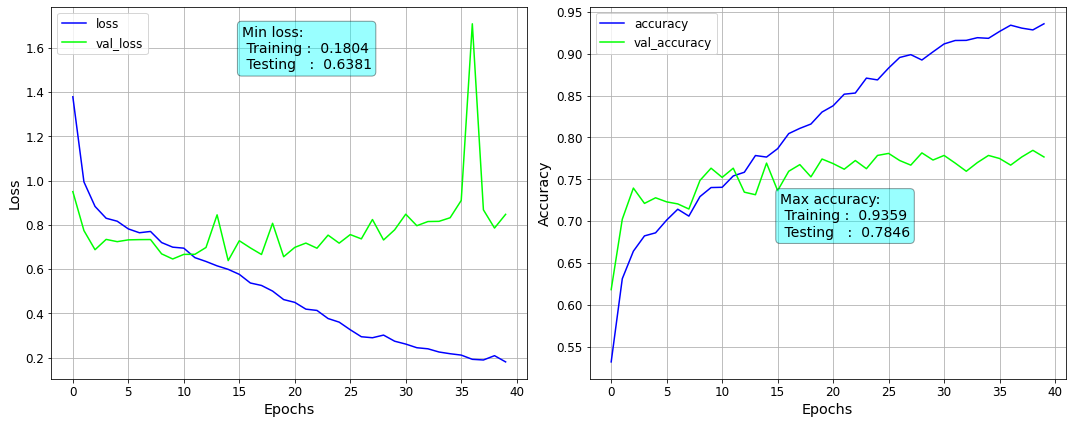

In [19]:
# Plot loss and accuracy curves for both testing and training
fn_plot_hist(res_df)

In [20]:
model.save(r'C:\Users\Devashish\Downloads/DNN_CNN_animal_Model.h5')